### <font color="red">Finite<font><font color="green"> Element<font><font color="blue"> Analysis<font>

This is an open-research conducted on Strength of Material and Design analysis, which are core study in Mechnical engineering. All material used during research are free of cost and open-source softwares, such as Jupyter Notebook, pandas, Python in-built libraries and Previous publish journals.

#### Hemant Thapa

Linkedin: https://www.linkedin.com/in/thapahemant/

Email: hemantthapa1998@gmail.com

#### Importing Libraries

In [105]:
import pandas as pd
import matplotlib.pyplot
import math

-----------------------

### Cantilever Beam - Single Load at the End

a) Cantilever Stress is calculated from the bending force and is dependent on the beam’s cross-section. For instance, if a member is quite small, there is not much cross-sectional area for the force to spread across, so the stress will be quite high.

b) Cantilevers deflect more than most types of beams since they are only supported from one end. This means there is less support for the load to be transferred. Cantilever beam deflection can be calculated in a few different ways, including using simplified cantilever beam equation.

Length: 1000 mm, height: 100 mm, and breadth: 50mm

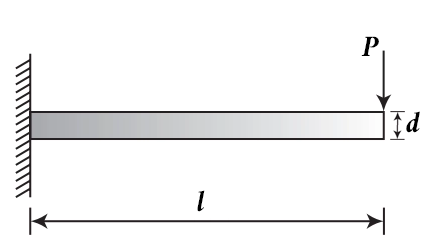

### A. Finite Element Model (Pre-processing)

#### 1. Engineering Data

Tensile Yield Strength: 200 Mpa

Compressive Yield  Strength:200 Mpa
    
Tensile Ultimate Strength: 460 Mpa

#### 2. Geometry

Extrude Length of beam: 1000 mm

height of beam: 100 mm

breadth of beam: 50mm

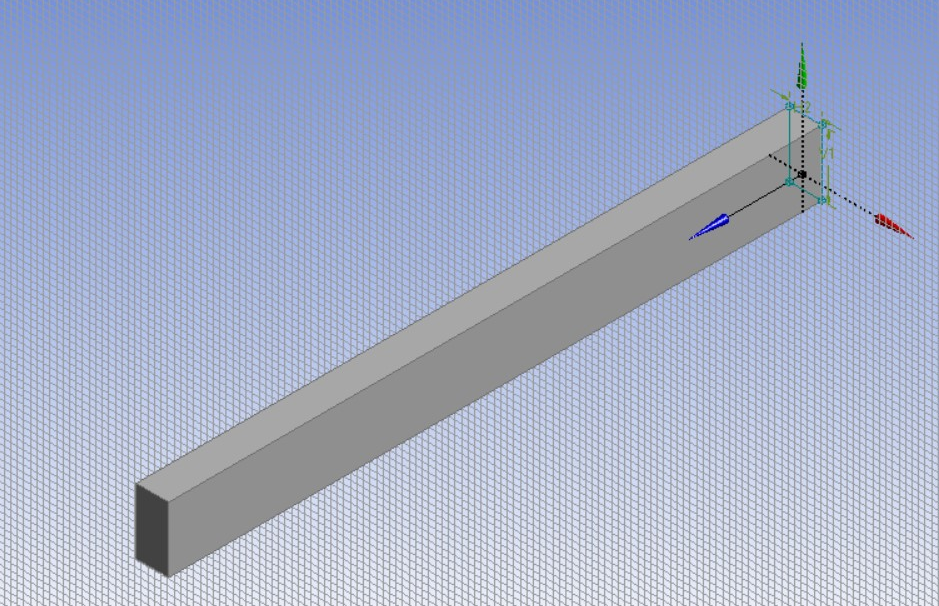

#### 3. Mesh Study

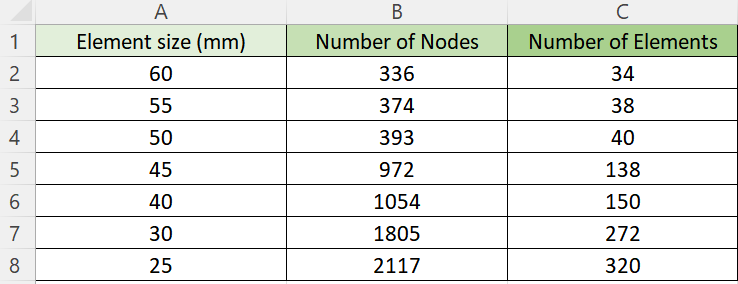

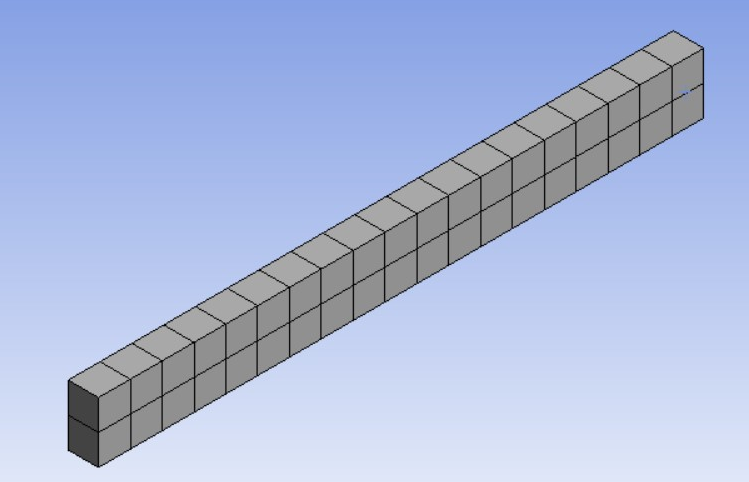

#### 4.Model Setup

1.Point A is fixed support


2.Load at point B is 10000 Newton

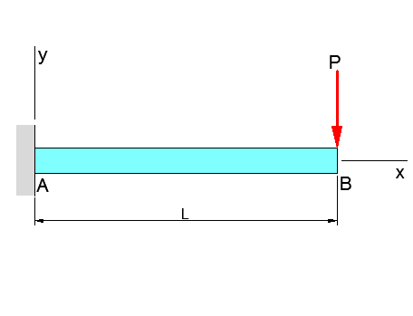

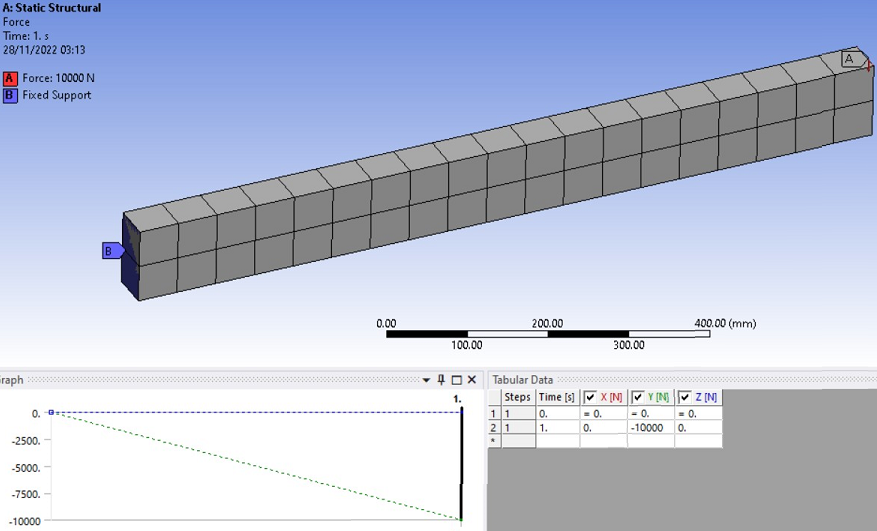

-----------------------

### B. Calculation through python programming (Validation)

#### 1. Cantilever Beam - Single Load at the End

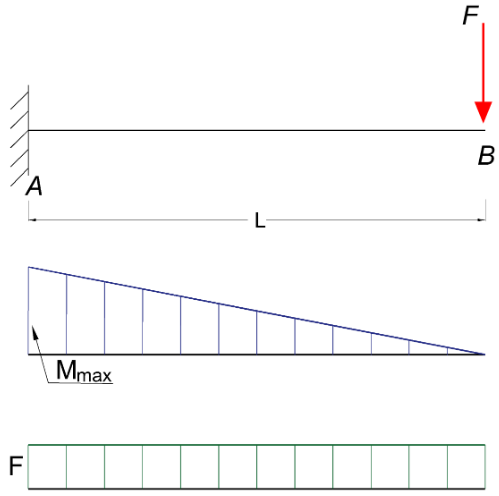

#### 2. Deflection Equations

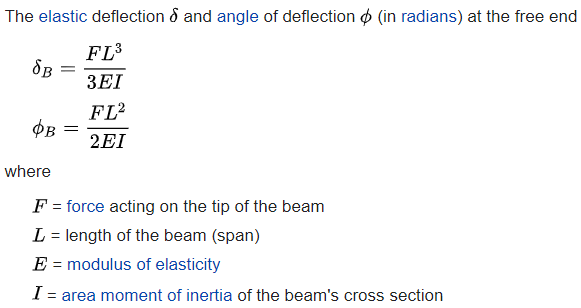

#### 5. Moment of inertia of a rectangular area about the axes crossing its centroid and parallel to its edges as shown.

1. To calculate I-x, consider a differential strip parallel to the x axis and with an area of dA=bdy as shown below.

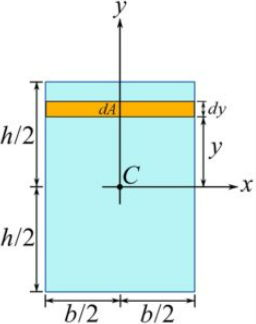

2. To calculate I-y, consider a differential strip parallel to the y axis and with an area of dA=hdx as shown below.

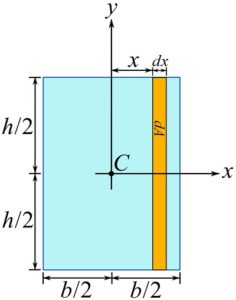

#### 6. MOMENT OF INERTIA

In [260]:
#Moment of inertia
l = float(input("Enter length (mm): "))
b = float(input("Enter breadth (mm): "))
h = float(input("Enter height (mm): "))
area = b*h
def moment_of_inertia(b,h):
        Ix = (b*h**3)/12
        Iy = (h*b**3)/12
        y = h/2
        return Ix, Iy, y
result = moment_of_inertia(b,h)
Ix = result[0]
Iy = result[1]
y = result[2]
print(f"\nIxx - The moment of inertia of a body along the horizontal axis: {round(Ix,4)}")
print(f"\nIyy - The moment of inertia of a body along the vertical axis: {round(Iy,4)}")
print(f"\nY - Distance to centriod from edge of y-axis: {y}mm")
print(f"\nArea: {area} mm square")

Enter length (mm): 1000
Enter breadth (mm): 50
Enter height (mm): 100

Ixx - The moment of inertia of a body along the horizontal axis: 4166666.6667

Iyy - The moment of inertia of a body along the vertical axis: 1041666.6667

Y - Distance to centriod from edge of y-axis: 50.0mm

Area: 5000.0 mm square


In [261]:
#Young modulus of Elasticity
E_gpa = float(input("Young modulus of elasticity (Gpa): "))
#Giga pascal to Mega pascal
E = E_gpa*1000

#point load 
w = float(input("Enter the value of load (Newton): "))

Young modulus of elasticity (Gpa): 200
Enter the value of load (Newton): 10000


#### 7.1 MAXIMUM DEFLECTION (Length of beam 1000mm)

In [262]:
def max_deflection(w,l,E,Ix):
    max_deflection = (w*(l**3))/(3*E*Ix)
    return max_deflection
result_deflection = max_deflection(w,l,E,Ix)
max_deflection = [result_deflection][0]
print(f"\nMaximum deflection of beam: {round(max_deflection,4)} milimeter")


Maximum deflection of beam: 4.0 milimeter


#### 8. SLOPE

In [263]:
def slope(w,l,E,Ix):
    slope_max = ((w)*(l**2))/(2*E*Ix)
    return slope_max
result_slope = slope(w,l,E,Ix)
max_slope = [result_slope][0]
print(f"\nMaximum slope: {max_slope} radians")                          


Maximum slope: 0.006000000000000001 radians


#### 9. SHEAR FORCE

In [264]:
V = +w
print(f"\nShear force: {round(V,2)} Newton")


Shear force: 10000.0 Newton


#### 10. MOMENT

In [265]:
x = 0
M = w*(l-x)
print(f"\nMoment: {M} Newton-milimeter")


Moment: 10000000.0 Newton-milimeter


#### 11. SHEAR STRESS

In [266]:
shear_stress = ((3/2)*(V/area))
print(f"\nShear stress: {shear_stress} Newton/milimeter square")


Shear stress: 3.0 Newton/milimeter square


#### 12. BENDING STRESS

In [267]:
bending_stress = (M * y) / (Ix)
print(f"\nBending stress: {bending_stress} Newton/milimeter square")


Bending stress: 120.0 Newton/milimeter square


#### 13. AXIAL STRESS

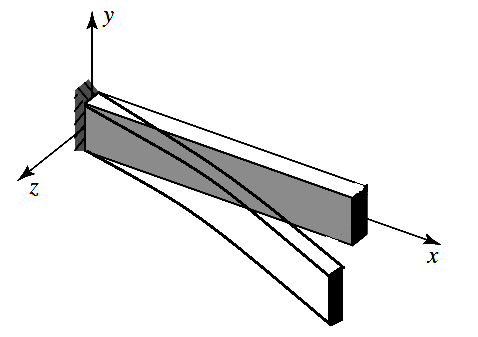

In [269]:
p = float(input("Enter Load in X direction (Newton):  "))
axial_stress = p/area
print(f"\nAxial_stress:{axial_stress}")

Enter Load in X direction (Newton):  0

Axial_stress:0.0


#### 14. VON-MISES STRESS

In [270]:
von_mises = math.sqrt((axial_stress+bending_stress)**2+3*(shear_stress)**2)
print(f"\nEquivalent Stress: {von_mises}MPa")


Equivalent Stress: 120.11244731500561MPa


-----------------------

### C. SOLUTION (Post-Processing)

#### 1. Validation through Python

In [271]:
print(f"\nMaximum deflection of beam: {round(max_deflection,4)} milimeter")
von_mises = math.sqrt((axial_stress+bending_stress)**2+3*(shear_stress)**2)
print(f"\nEquivalent Stress: {von_mises}MPa")


Maximum deflection of beam: 4.0 milimeter

Equivalent Stress: 120.11244731500561MPa


#### 2. Stress Study Finite Element Model

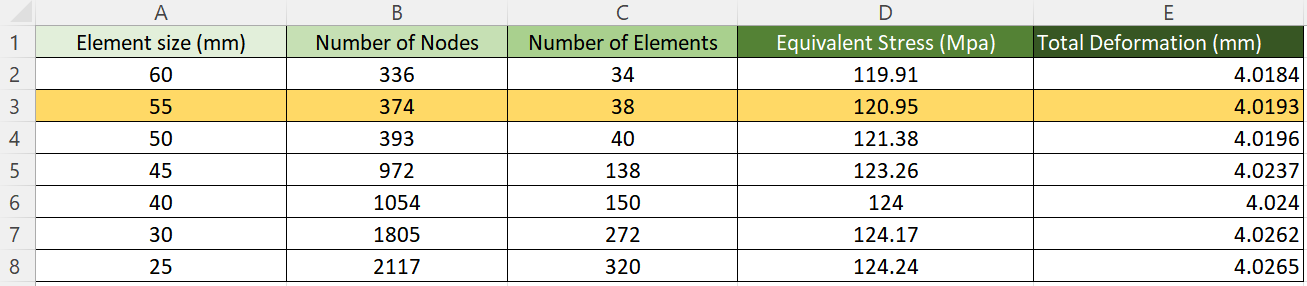

#### Element size 55mm, generate 374 degree of freedom and 38 number of elements. where, Equivalent stress is around 120.95Mpa and Total deforamtion is around 4.0193mm

 - Equivalent Stress

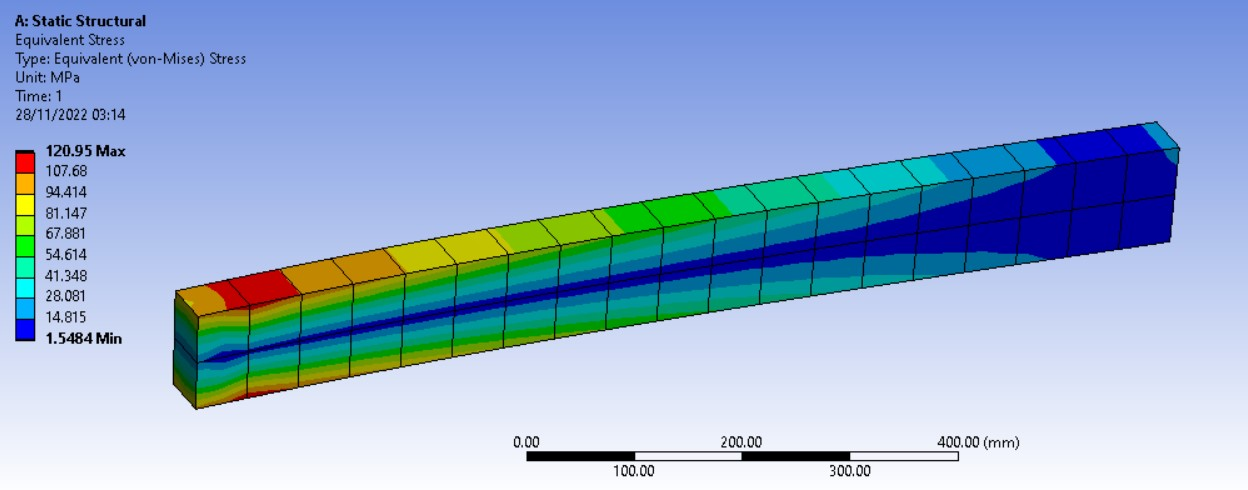

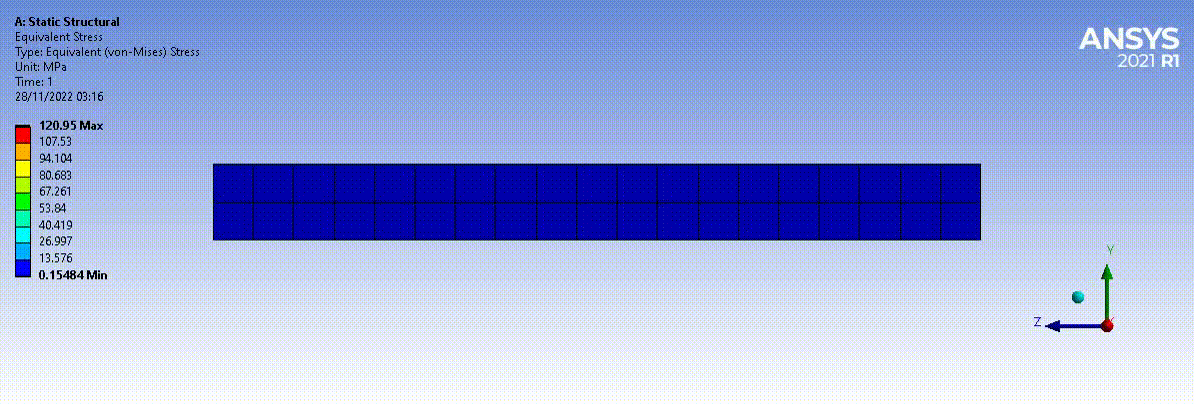

- Total Deformation

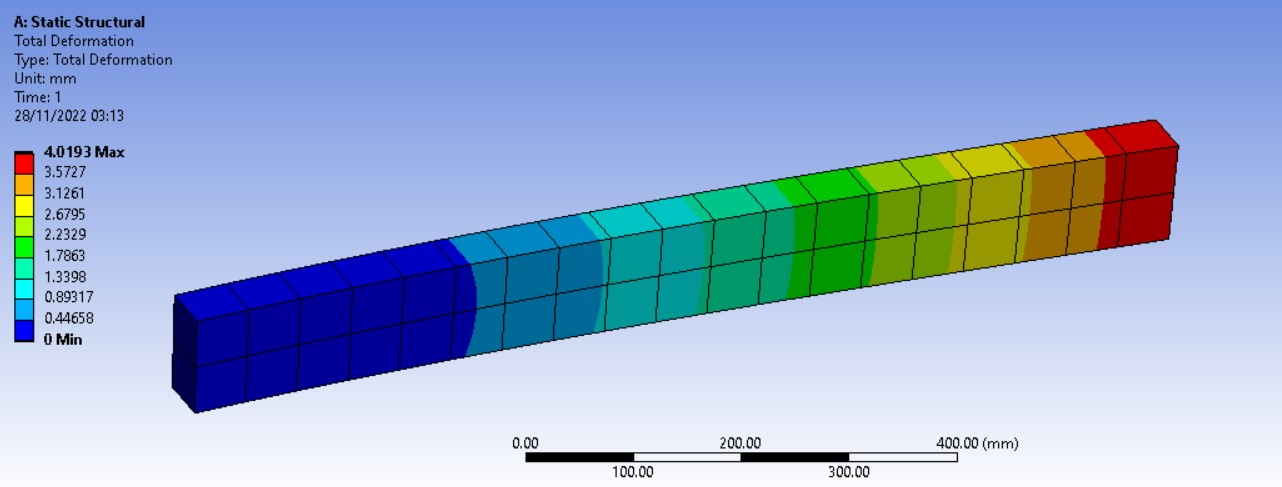

- Total Deformation study 

In [272]:
data = {"Maximum Deflection (mm)":max_deflection, "Max Slope (radians)":max_slope, "Shear Force (N)":V, "Moment (N-mm)":M, "Shear Stress (N/mm2)":shear_stress,"Von-Mises Stress (Mpa)":von_mises}
df = pd.DataFrame([data])
df

Maximum Deflection (mm)  Max Slope (radians)  Shear Force (N)  \
0                      4.0                0.006          10000.0   

   Moment (N-mm)  Shear Stress (N/mm2)  Von-Mises Stress (Mpa)  
0     10000000.0                   3.0              120.112447

-----------------------

### D. Case Study

#### 1. Increasing double the length of beam

In [273]:
l = [1000,2000] 
deflection = [] 
for i in l:
    deflection_formula = w*(i**3)/(3*E*Ix)
    deflection.append(deflection_formula)
case_1 = {"Y - length of beam (mm)":l, "X - deflection (mm)":deflection}
df_case_1 = pd.DataFrame(case_1)
df_case_1

Y - length of beam (mm)  X - deflection (mm)
0                     1000                  4.0
1                     2000                 32.0

In [274]:
x1 = df_case_1["X - deflection (mm)"][0]
x2 = df_case_1["X - deflection (mm)"][1]
factor = x2/x1
print(f"\nIncreasing the double the length of beam, deflection increased by factor of {factor}")


Increasing the double the length of beam, deflection increased by factor of 8.0


#### 2. INCREASED IN BEAM LENGTH 10 TIMES

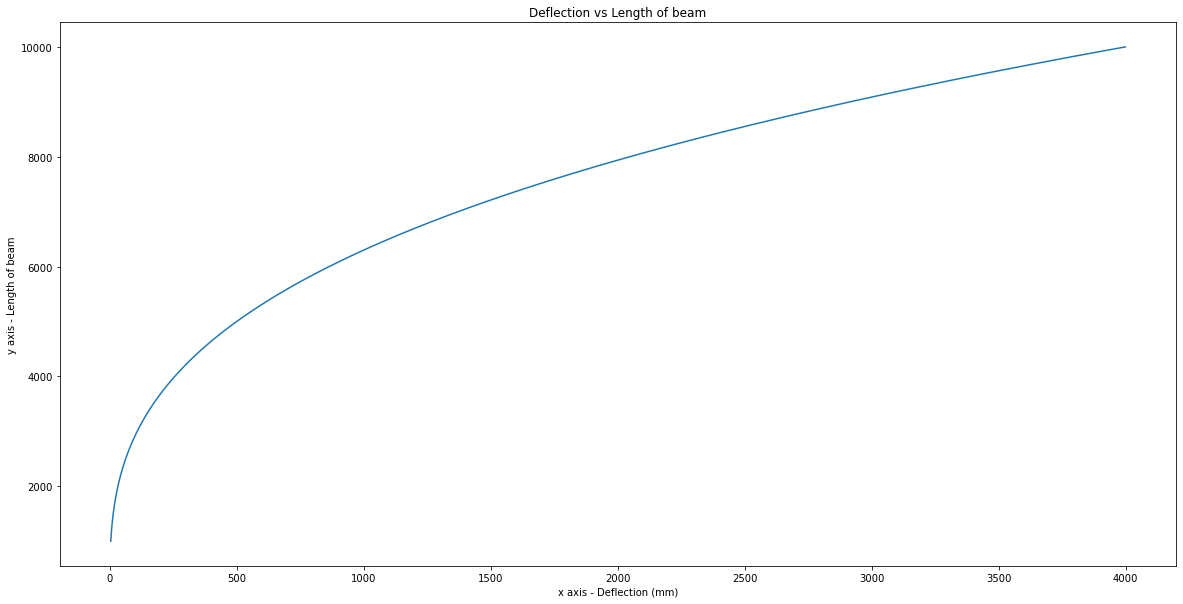

In [275]:
l = [x for x in range(1000,10000)] 
for i in l:
    deflection_formula = w*(i**3)/(3*E*Ix)
    deflection.append(deflection_formula)
case_1 = {"length of beam (mm)":l, "deflection (mm)":deflection}
df_case_1 = pd.DataFrame(case_1)
plt.figure(figsize=(20,10))
plt.plot(deflection, l)
plt.title('Deflection vs Length of beam')
plt.xlabel('x axis - Deflection (mm)')
plt.ylabel('y axis - Length of beam')
plt.show()